<a href="https://colab.research.google.com/github/guscldns/dacon-/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_EDA(%ED%98%84%EC%B9%98%EC%9A%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/<1OXXXRsD6sr85LfDn2FmFMIM2QzKKqFX>/view?usp=sharing

https://drive.google.com/uc?id=<>부분입력

!gdown https://drive.google.com/uc?id=1OxxxNzRsD6sr85LfDn2FmFMIM2QzKKqFX

-  Data 폴더를 생성하여 파일을 이동

!mkdir data
!mv /content/받은파일명 /content/data

In [ ]:
# 드라이브 파일 train : https://drive.google.com/file/d/1F6Otr01l-sUUR_1AdTM925tAGDE_L--t/view?usp=drive_link
# test : https://drive.google.com/file/d/13lNIGs3wsD0mZF4OauV4GhZQHniNjK6d/view?usp=drive_link
# sub misson : https://drive.google.com/file/d/1RLdtGa4N62Q_5XFp0OOGTR5iVFObxjme/view?usp=drive_link

In [ ]:
!gdown https://drive.google.com/uc?id=1F6Otr01l-sUUR_1AdTM925tAGDE_L--t

Downloading...
From: https://drive.google.com/uc?id=1F6Otr01l-sUUR_1AdTM925tAGDE_L--t
To: /content/train.csv
100% 3.47M/3.47M [00:00<00:00, 130MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=13lNIGs3wsD0mZF4OauV4GhZQHniNjK6d

Downloading...
From: https://drive.google.com/uc?id=13lNIGs3wsD0mZF4OauV4GhZQHniNjK6d
To: /content/test.csv
100% 1.28M/1.28M [00:00<00:00, 111MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1RLdtGa4N62Q_5XFp0OOGTR5iVFObxjme

Downloading...
From: https://drive.google.com/uc?id=1RLdtGa4N62Q_5XFp0OOGTR5iVFObxjme
To: /content/sample_submission.csv
100% 120k/120k [00:00<00:00, 84.4MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
sample = pd.read_csv("/content/sample_submission.csv")

1. gender: 성별
2. car: 차량 소유 여부
3. realty: 부동산 소유 여부
4. child_num: 자녀 수
5. income_total: 연간 소득
6. income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
7. edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
8. family_type: 결혼 여부 ['Married', 'Civil marriage'(민간결혼), 'Separated'(별거), 'Single / not married', 'Widow'(사별)]
9. house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment'(공용), 'Rented apartment', 'Office apartment']
10. DAYS_BIRTH: 출생일 (데이터 수집 당시 0부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미)
11. DAYS_EMPLOYED: 업무 시작일 (데이터 수집 당시 0부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함)
12. FLAG_MOBIL: 핸드폰 소유 여부
13. work_phone: 업무용 전화 소유 여부
14. phone: 가정용 전화 소유 여부
15. email: 이메일 소유 여부
16. occyp_type: 직업 유형
17. family_size: 가족 규모
18. begin_month: 신용카드 발급 월 (데이터 수집 당시 0부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)
19. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (낮을 수록 높은 신용의 신용카드 사용자를 의미함)

In [ ]:
sample

In [ ]:
train

In [ ]:
test

In [ ]:
train.info()
print('-'*50)
test.info()

### 결측치 확인

In [ ]:
train.isnull().sum()
test.isnull().sum()

 ### 개인의 특징을 확인할 수 있을 것 같은 열 확인

```
 1   gender         26457 non-null  object : F/M 성별
 2   car            26457 non-null  object : N/Y 자동차 소유 여부
 3   reality        26457 non-null  object : N/Y 부동산 소유 여부
 4   income_type    26457 non-null  object : 소득 분류
 5   edu_type       26457 non-null  object : 교육 수준
 6   family_type    26457 non-null  object : 결혼 여부
 7   house_type     26457 non-null  object : 주택
 8   occyp_type     18286 non-null  object : 직업 종류

```

In [ ]:
train['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

In [ ]:
train['car'].value_counts()

N    16410
Y    10047
Name: car, dtype: int64

In [ ]:
train['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

In [ ]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [ ]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [ ]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

### 훈련 데이터 숫자형 수치 파악

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
train.describe(include=['O'])

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,18286
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,17697,16410,17830,13645,17995,18196,23653,4512


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


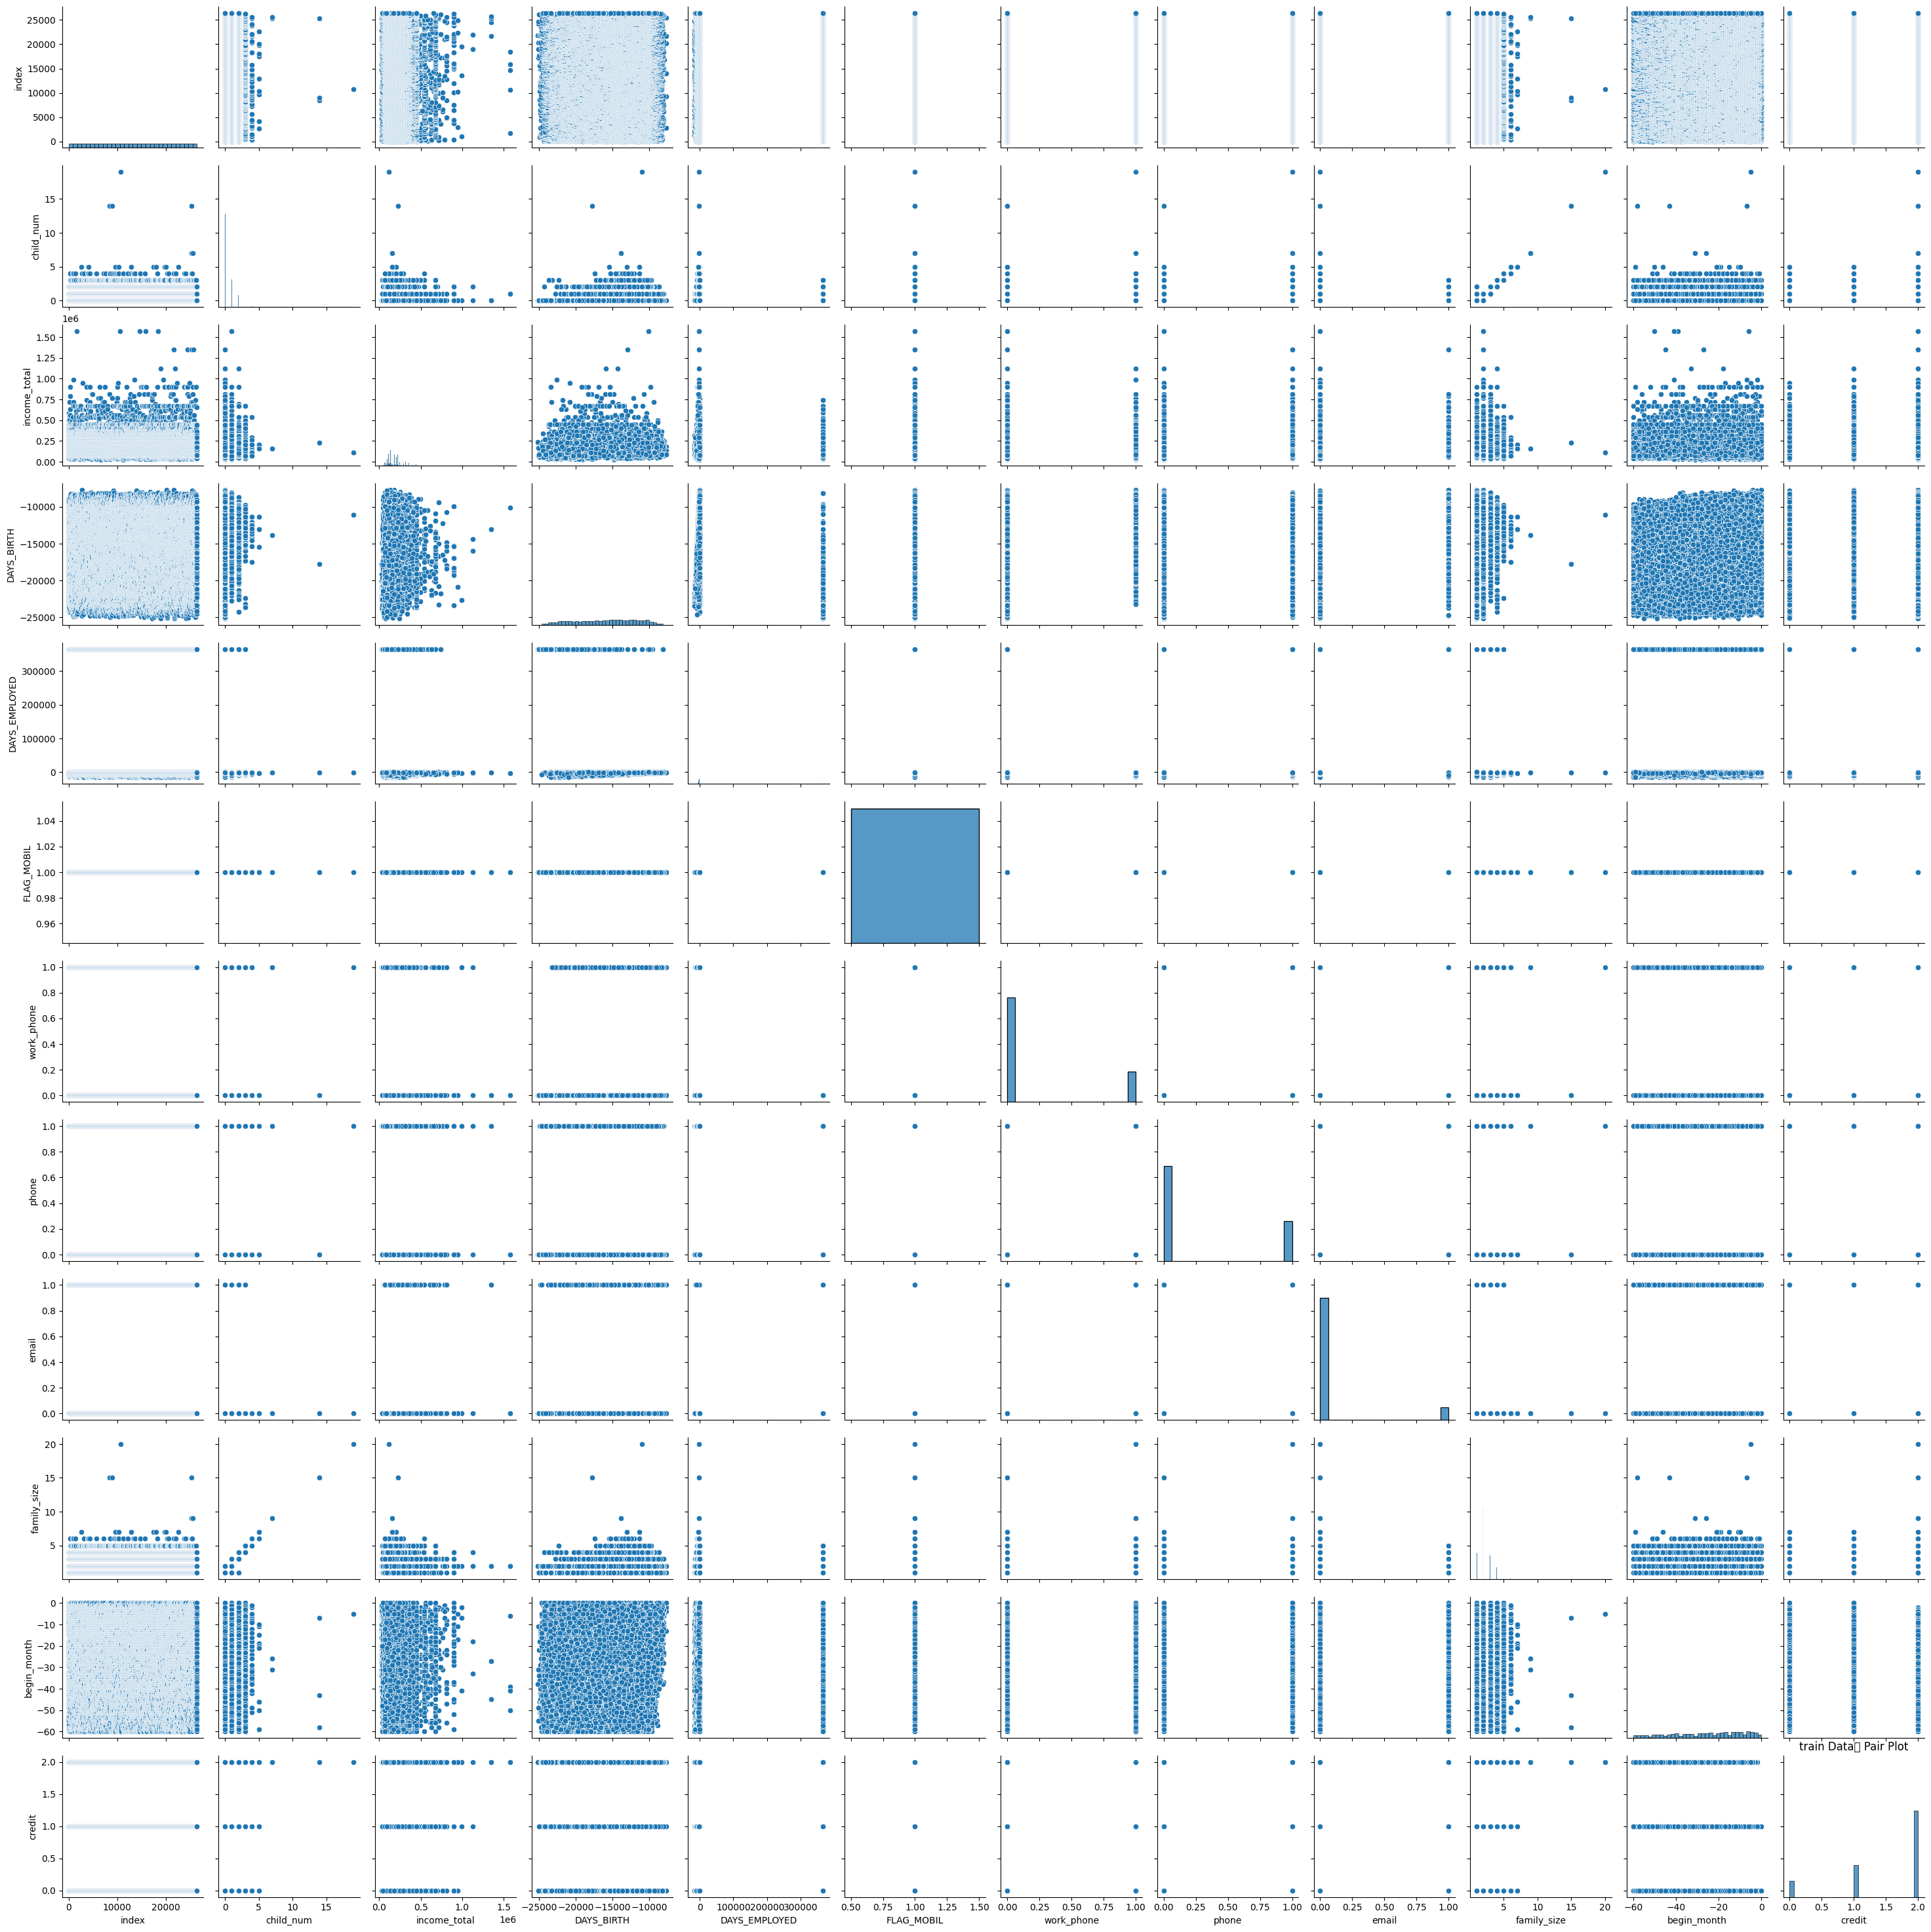

In [ ]:
# 각 피처의 상관관계 확인
sns.pairplot(train)
plt.title("train Data의 Pair Plot")
plt.show()

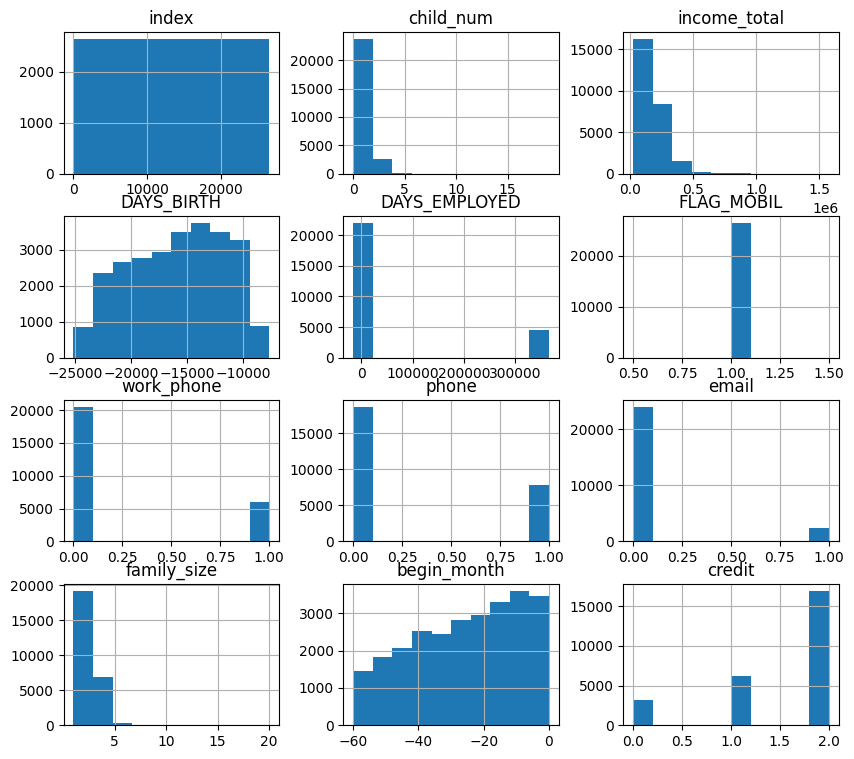

In [ ]:
# 숫자형 열들 분포 확인
train.hist(figsize=(10, 9))
plt.show()

<ipython-input-61-2c89756c92dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = sns.heatmap(train.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)


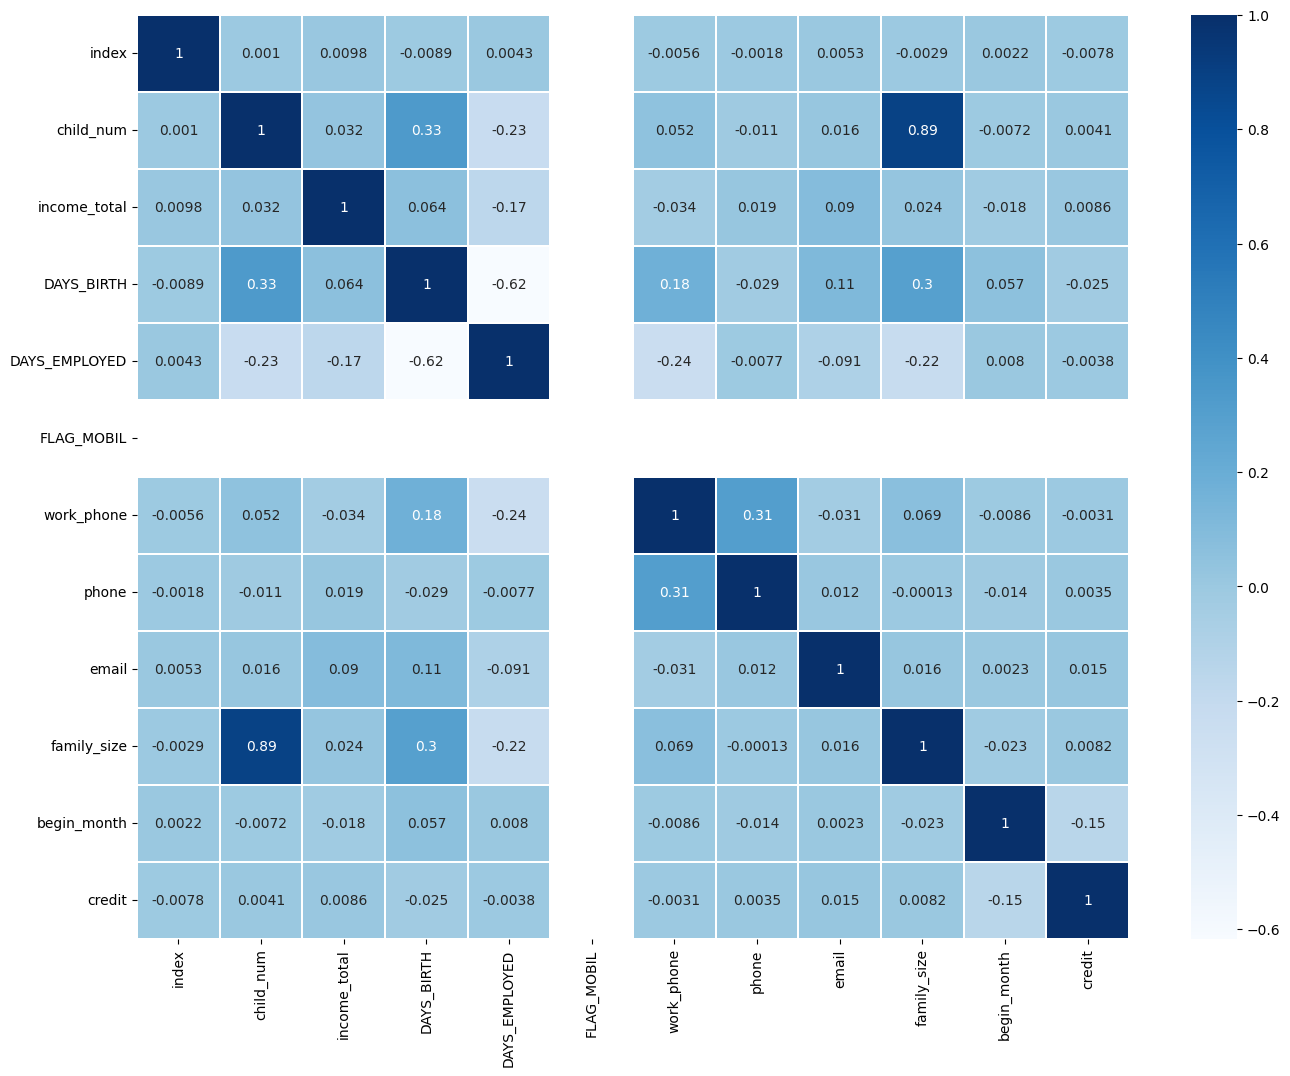

In [ ]:
# 상관관계 확인
plt.figure(figsize = (16, 12))
x = sns.heatmap(train.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

In [ ]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
lb_Encoder = LabelEncoder()
lb_Encoder.fit(train['gender'])
lb_Labels = lb_Encoder.transform(train['gender'])
print(lb_Encoder.classes_)

['F' 'M']


In [ ]:
train_data = train.copy()
train_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


### 라벨인코더 해보기

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
LE.fit(train['gender'])
train_data['gender'] = LE.transform(train_data['gender'])
# 되돌리고 싶을 때는 LE.inverse_transform(train['gender'])

train_data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,0,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,0,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,1,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
